# Data inputs and Display Libraries



In [ ]:

import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.5f' % x)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [ ]:
#Installing Libraries


!pip install unrar

In [ ]:
# !git clone https://github.com/univai-ghf/ClassificationWorkshop.git

!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/prep_file.rar"
!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/num_cols.csv"
!wget "https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/str_cols.csv"

--2022-04-02 01:55:14--  https://github.com/univai-ghf/ghfmedia/raw/main/data/Classification/prep_file.rar
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Classification/prep_file.rar [following]
--2022-04-02 01:55:14--  https://raw.githubusercontent.com/univai-ghf/ghfmedia/main/data/Classification/prep_file.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 954088 (932K) [application/octet-stream]
Saving to: ‘prep_file.rar’

prep_file.rar       100%[===================>] 931.73K  --.-KB/s    in 0.009s  

2022-04-02 01:55:14 (102 MB/s) - ‘prep_file.rar’ saved [9540

In [ ]:
#! unzip -q 'workshop_classification/prep_file.rar' -d 'workshop_classification/prep_file.csv'
!unrar x './prep_file.rar'  './'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./prep_file.rar

Extracting  ./prep_file.csv                                                3%  6% 10% 13% 17% 20% 24% 27% 30% 34% 37% 41% 44% 48% 51% 54% 58% 61% 65% 68% 72% 75% 78% 82% 85% 89% 92% 96% 99%  OK 
All OK


In [ ]:
### Run till here

In [ ]:
t1 = pd.read_csv("prep_file.csv",sep=",")

# Step 1-  Look at the data

In [ ]:
t1.head()

,Unnamed: 0,income,age,experience,bureau_score,married,house_ownership,car_ownership,risk_flag,profession,city,state,current_job_years,current_house_years,device
0,19607,2514921,31.00000,4.00000,651.00000,single,rented,no,0,Psychologist,Chandrapur,Maharashtra,4.00000,14.00000,Oppo
1,75516,7047674,28.00000,4.00000,526.00000,single,rented,yes,0,Economist,Ramagundam[27],Telangana,3.00000,13.00000,Xiaomi
2,63804,2749317,30.00000,2.00000,526.00000,single,rented,no,0,Secretary,Ramagundam[27],Telangana,2.00000,14.00000,samsung
3,63676,7378274,24.00000,0.00000,764.00000,single,rented,no,0,Flight attendant,Adoni,Andhra Pradesh,0.00000,11.00000,samsung
4,50914,9574585,27.00000,5.00000,739.00000,single,rented,yes,0,Technician,Imphal,Manipur,5.00000,10.00000,Vivo


In [ ]:
#![](./presentation/Capture1.png)


# Look at data - now to get the target variable distribution

In [ ]:
t1["risk_flag"].value_counts()

0    236567
1     43433
Name: risk_flag, dtype: int64

In [ ]:
t1["risk_flag"].value_counts(normalize=True)

0   0.84488
1   0.15512
Name: risk_flag, dtype: float64

# Look at data - listing string and numeric columns

In [ ]:
str_col_name_df = pd.read_csv("str_cols.csv")
str_col_name_df.columns = ["index","col_name"]
str_col_name_list =list(str_col_name_df["col_name"])

num_col_name_df = pd.read_csv("num_cols.csv")
num_col_name_df.columns = ["index","col_name"]
num_col_name_df=num_col_name_df.reset_index()
num_col_name_list = list(num_col_name_df["col_name"])

In [ ]:
print (str_col_name_list)
print (num_col_name_list)

['profession', 'married', 'house_ownership', 'car_ownership', 'city', 'state']
['income', 'age', 'experience', 'current_job_years', 'current_house_years', 'bureau_score']


In [ ]:
####Back to Slide

# EDA

In [ ]:
#installing EDA libraries
!pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 22.3 MB/s 


In [ ]:
sweet_report = sv.analyze([t1,"full_data"],target_feat="risk_flag")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#5 mins to run the code

In [ ]:
t0 = t1.copy()
for i in str_col_name_list:
    t1[i] = t1[i].str.lower().str.lstrip().str.rstrip()
    t1[i] = t1[i].str.replace("[^a-z\s]+","")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
####back to slide

# Train test split
### Before we do any preprocessing we want to keep train and test seperate

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(t1, t1["risk_flag"], test_size=0.33, random_state=42)

In [ ]:
x_train0 = x_train.reset_index()
x_test0 = x_test.reset_index()

In [ ]:
x_train0.shape, x_test0.shape

((187600, 16), (92400, 16))

#Label encoding string Variables -- baseline categorical approach

# **Data Preprocessing Libraries**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder


In [ ]:


enc = OrdinalEncoder()

x_train_str= pd.DataFrame(enc.fit_transform(x_train0[str_col_name_list]))
x_test_str = pd.DataFrame(enc.transform(x_test0[str_col_name_list]))

In [ ]:
viz1 = x_train_str.head()
viz1 = viz1.astype(int)
viz1.columns = str_col_name_list
viz1

,profession,married,house_ownership,car_ownership,city,state
0,23,1,2,0,94,25
1,8,1,2,0,219,18
2,41,1,2,0,131,2
3,17,1,2,0,52,13
4,47,0,1,1,14,14


In [ ]:
x_train_str.shape

(187600, 6)

In [ ]:
enc.categories_

[array(['air traffic controller', 'analyst', 'architect', 'army officer',
        'artist', 'aviator', 'biomedical engineer', 'chartered accountant',
        'chef', 'chemical engineer', 'civil engineer', 'civil servant',
        'comedian', 'computer hardware engineer', 'computer operator',
        'consultant', 'dentist', 'design engineer', 'designer', 'drafter',
        'economist', 'engineer', 'fashion designer', 'financial analyst',
        'firefighter', 'flight attendant', 'geologist', 'graphic designer',
        'hotel manager', 'industrial engineer', 'lawyer', 'librarian',
        'magistrate', 'mechanical engineer', 'microbiologist', 'official',
        'petroleum engineer', 'physician', 'police officer', 'politician',
        'psychologist', 'scientist', 'secretary', 'software developer',
        'statistician', 'surgeon', 'surveyor', 'technical writer',
        'technician', 'technology specialist', 'web designer'],
       dtype=object),
 array(['married', 'single'], dtype=

# Concatenating Numeric and categorical

In [ ]:
df_all_train1 = pd.concat([x_train_str,x_train0[num_col_name_list]],axis=1)
df_all_test1 = pd.concat([x_test_str,x_test0[num_col_name_list]],axis=1)

In [ ]:
sel_cols = str_col_name_list + num_col_name_list

In [ ]:
##back to presentation

# Building Model

# Feature Selection & Modelling Libraries

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

In [ ]:

le = preprocessing.LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.transform(y_test)

In [ ]:
class_weights = [0.1,0.9]



xgb = XGBClassifier(n_estimators=300,max_depth= 5,subsample= 0.2,class_weights = class_weights,scale_pos_weight=6,
                    colsample_bytree= 0.3)
xgb.fit(df_all_train1,y_train1)


XGBClassifier(class_weights=[0.1, 0.9], colsample_bytree=0.3, max_depth=5,
              n_estimators=300, scale_pos_weight=6, subsample=0.2)

In [ ]:
##back to presentation

# Measure

# Metrics Libraries

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [ ]:
def cf_mat_conv(cf_mat):
    cf_mat1 = pd.DataFrame(cf_mat)

    
    cols0 = cf_mat1.columns
    #print (cols0)
    cols1 = []
    rows1 = []
    for i in cols0:
        i1 = "pred_" + str(i)
        i2 = "actual_" + str(i)
        cols1.append(i1)
        rows1.append(i2)
    #print (rows1)
    cf_mat1.columns = cols1
    cf_mat1["vals"] = rows1
    return cf_mat1

In [ ]:
def get_metrics1(mod1,test_set,actual1,fg):
    mod = eval(mod1)
    pred=mod.predict(test_set)
    #print(pred)
    pred1=mod.predict_proba(test_set)[:,1]
    
    ac1 = accuracy_score(actual1, pred)
    cf_mat1 = confusion_matrix(actual1, pred, labels=None, sample_weight=None)
    cf_mat_orig = cf_mat1.copy()

    
    #print (b_test_b.shape)
    cf_mat1 = cf_mat_conv(cf_mat1)

    
    fpr, tpr, thresholds = roc_curve(actual1, pred1)
    auc_pr = average_precision_score(actual1, pred1)
    auc1 = auc(fpr, tpr)
    f1scr = f1_score(actual1, pred, average='macro')
    
    if(fg==1):
        pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
        pyplot.plot(fpr, tpr, marker='.')
    # show the plot
        pyplot.show()

        precision, recall, thresholds = precision_recall_curve(actual1, pred1)
        pyplot.plot(precision, recall, marker='.')
        pyplot.show()

        cmd = ConfusionMatrixDisplay(cf_mat_orig)
        cmd.plot(values_format='')

    return ac1,cf_mat1,auc1,f1scr,auc_pr


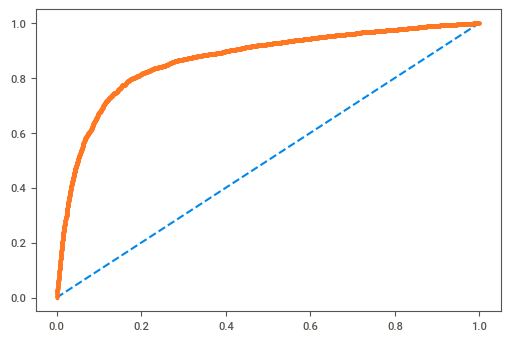

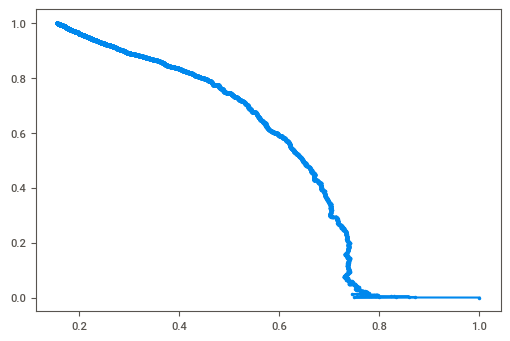

(0.7548593073593074,    pred_0  pred_1      vals
0   57635   20471  actual_0
1    2180   12114  actual_1, 0.8674575588782634, 0.6762941000896743, 0.5845599228765508)


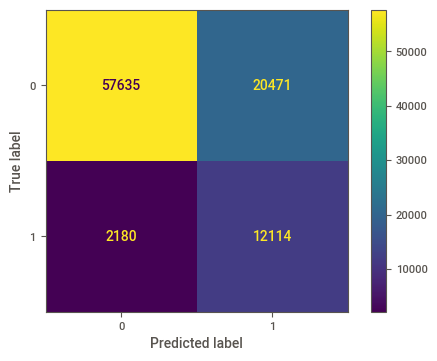

In [ ]:
print (get_metrics1("xgb",df_all_test1,y_test1,1))

In [ ]:
##back to presentation

# Explaining the Model

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 27.6 MB/s 


In [ ]:
df1_tr = pd.DataFrame(df_all_train1)
df1_tr.columns =sel_cols
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(df1_tr)



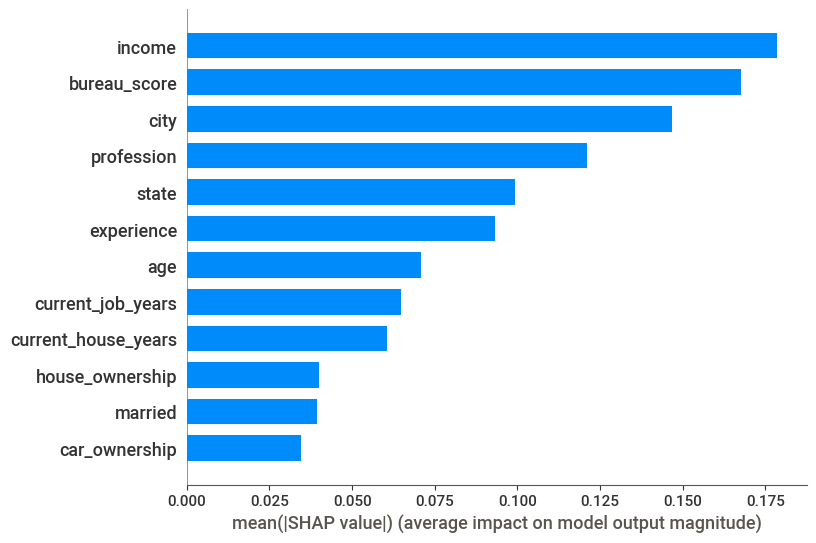

In [ ]:
shap.summary_plot(shap_values, df1_tr, plot_type="bar")

# Homework Starts From Here

## One hot encoding

In [ ]:
#OneHotEncoding the data
enc = OneHotEncoder(handle_unknown='ignore')

#use fit_transform method of onehotencoder to one hot encode categorical columns of x_train0 and x_test0

df_one_hot_tr = pd.DataFrame(_____.fit_transform(np.array(_____[str_col_name_list])).todense())
df_one_hot_te = pd.DataFrame(enc.transform(np.array(x_test0[_________])).todense())
colnames = enc.get_feature_names_out()

#assign column names of one hot dataframes to colnames
df_one_hot_tr.columns = ________
df_one_hot_te.columns = ________

NameError: ignored

In [ ]:
# take a look at the one hot coded training dataframe using .head()
df_one_hot_tr.______()

In [ ]:
# concatenate one hot encoded colmns to the numerical columns of the train and test data [num_col_name_list] along axis =1
df_all_one_hot_train1 = pd.concat([df_one_hot_tr,x_train0[______________]],axis=__)
df_all_one_hot_test1 = pd.concat([df_one_hot_te,x_test0[______________]],axis=___)

In [ ]:
#make a list of all selected columns adding list of colnames and num_col_name_list
sel_cols = list(colnames) + ___________

In [ ]:
class_weights = [0.1,0.9]


#Create model instance of XGBClassifier with n_estimators =100, max_depth =5, subsample =0.2, 
# class_weights as class_weights we created above, scale_pos_weight =6, colsample_bytree = 0.3
xgb_ohe = XGBClassifier(n_estimators=____,max_depth= ___,subsample= ____,class_weights = class_weights,scale_pos_weight=___,
                    colsample_bytree= ___,n_jobs=6)
# for the model on train data(df_all_one_hot_train1 and y_train1)
xgb_ohe.fit(________________,______)


In [ ]:
print (get_metrics1("xgb_ohe",df_all_one_hot_test1,y_test1,1))

In [ ]:
df1_tr_ohe = pd.DataFrame(df_all_one_hot_train1)
df1_tr_ohe.columns =sel_cols

#Lets do some XAI using SHAP input the model xgb_ohe in shap.treeexplainer
explainer_ohe = shap.TreeExplainer(_____)
#input the training dataframe df1_tr_ohe 
shap_values_ohe = explainer_ohe.shap_values(_______)

In [ ]:
#Lets make a summary plot of shap_values_ohe, df1_tr_ohe with a "bar" plot
shap.summary_plot(____________, _________, plot_type="___")

## Median Impute of Missing Values

In [ ]:
#### median impute of missing values

In [ ]:
#create simpleimputer object for replacing nan values with median [missing_values=np.nan, strategy='median']
imp_median = SimpleImputer(missing_values=______, strategy='_____')
#we can impute numerical columns by this Simple Imputer. So pass numerical columns of x_train0[num_col_name_list]
imp_median.fit(x_train0[____________])
#transform both test and train data using imp_mean 
x_train_num = pd.DataFrame(imp_median.transform(x_train0[_________]))
x_test_num = pd.DataFrame(imp_median.transform(x_test0[____________]))

x_train_num.columns = num_col_name_list
x_test_num.columns = num_col_name_list

In [ ]:
#concatenate the string columns and the numerical columns of Train and test data along axis =1
df_all_imp_train1 = pd.concat([x_train_str,_______],axis=___)
df_all_imp_test1 = pd.concat([x_test_str,________],axis=1)

In [ ]:
class_weights = [0.1,0.9]

#Create model instance of XGBClassifier with n_estimators =300, max_depth =5, subsample =0.2, 
# class_weights as class_weights we created above, scale_pos_weight =6, colsample_bytree = 0.3

xgb_imp = XGBClassifier(n_estimators=300,max_depth= 5,subsample= 0.2,class_weights = class_weights,scale_pos_weight=6,
                    colsample_bytree= 0.3)
xgb_imp.fit(df_all_imp_train1,y_train1)

In [ ]:
print (get_metrics1("xgb_imp",df_all_imp_test1,y_test1,1))

## Putting it all together

In [ ]:
#Making a dataframe with the metrics : accuracy, auc, f1, auc_pr for the different models we created using different data sets

#make a list of datasets created : df_all_test1,df_all_one_hot_test1,df_all_imp_test1
df_datasets = [________,________,___________]

# loop over the models we created respectively in the list above: "xgb","xgb_ohe","xgb_imp"

for num,i in enumerate(["___","_______","___________"]):
    print (num)
    ac1,cf_mat1,auc1,f1scr,auc_pr = get_metrics1(i,df_datasets[num],y_test1,0)
    
    # make a data frame of selected metrics (ac1,auc1,f1scr,auc_pr)
    df_met = pd.DataFrame([(__,__,___,____)])
    #name the columns of data frame
    df_met.columns = ["accuracy","auc","f1","auc_pr"]
    df_met["model"] = i
    
    if(num==0):  
        df_met_all = df_met
    else:
        #concatenate the data frames to create one data frame
        df_met_all = pd.concat([df_met,df_met_all],axis=0)

In [ ]:
#visualise the metrics data frame using .head()
df_met_all._____()

In [ ]:
##back to presentation